In [1]:
import sqlite3
import pandas as pd

Get the whole human databae

In [2]:
db_file = "/cta/share/users/uniprot/human/human.db"
conn = sqlite3.connect(db_file)
df_uniprot_human_seqs = pd.read_sql(f"SELECT Entry, Sequence  FROM proteins", conn)
conn.close()

Get the whole uniref90 distilled, join it with uniprot_id

In [11]:
db_file = "/cta/share/users/uniprot/human/human.db"
conn = sqlite3.connect(db_file)
df_uniprot_human_seqs = pd.read_sql(f"SELECT Sequence FROM proteins WHERE Entry IN (SELECT uniprot_accession FROM uniref50_distilled)", conn)
conn.close()
df_uniprot_human_seqs.head

<bound method NDFrame.head of                                                 Sequence
0           MELSAEYLREKLQRDLEAEHVLPSPGGVGQVRGETAASETQLGS
1      MGLEALVPLAMIVAIFLLLVDLMHRHQRWAARYPPGPLPLPGLGNL...
2      MSRSLLLWFLLFLLLLPPLPVLLADPGAPTPVNPCCYYPCQHQGIC...
3      MFRRLTFAQLLFATVLGIAGGVYIFQPVFEQYAKDQKELKEKMQLV...
4                                       MRWQEMGYIFYPRKLR
...                                                  ...
70896  MLQEWLAAVGDDYAAVVWRPEGEPRFYPDEEGPKHWTKERHQFLME...
70897  EVKGLFKSENCPKVISCEFAHNSNWYITFQSDTDAQQAFKYLREEV...
70898  MAGLTDLQRLQARVEELERWVYGPGGARGSRKVADGLVKVQVALGN...
70899  MSGYSSDRDRGRDRGFGAPRFGGSRAGPLSGKKFGNPGEKLVKKKW...
70900  XHGADAMHTDPDYSAAYVVIETDAEDGIKGCGITFTLGKGTEVDWS...

[70901 rows x 1 columns]>

In [4]:
filtered_sequences = df_uniprot_human_seqs[
    (df_uniprot_human_seqs["Sequence"].str.count("X") <= 1) &
    (df_uniprot_human_seqs["Sequence"].str.count("B") <= 1) &
    (df_uniprot_human_seqs["Sequence"].str.count("U") <= 1) &
    (df_uniprot_human_seqs["Sequence"].str.count("Z") <= 1)
]["Sequence"].tolist()
print(len(filtered_sequences))


93229


In [6]:
corpus = filtered_sequences
alphabet = []
for seq in corpus:
    for letter in seq:
        if letter not in alphabet:
            alphabet.append(letter)
alphabet.sort()
print(alphabet)

['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


In [6]:
import bpe_functions
sequences = bpe_functions.corpus_to_symlist_list(corpus)
merge_heap = bpe_functions.sequences_to_heap(sequences)
[str(elem) for elem in merge_heap.heap[:10]]

['Pair: (L, L), Count: 314240',
 'Pair: (S, S), Count: 282666',
 'Pair: (L, S), Count: 235001',
 'Pair: (E, E), Count: 221513',
 'Pair: (S, L), Count: 250832',
 'Pair: (E, L), Count: 181067',
 'Pair: (L, A), Count: 192334',
 'Pair: (A, A), Count: 204084',
 'Pair: (A, S), Count: 174725',
 'Pair: (S, G), Count: 190505']

In [ ]:
options = {
    "corpus": corpus,
    "stop_type": "vocab_size",
    "stop_parameter": 51200
}

new_vocabulary = bpe_functions.train_bpe(**options)
new_vocabulary

{'A': {'frequency': 0, 'order': 0},
 'C': {'frequency': 0, 'order': 0},
 'D': {'frequency': 0, 'order': 0},
 'E': {'frequency': 0, 'order': 0},
 'F': {'frequency': 0, 'order': 0},
 'G': {'frequency': 0, 'order': 0},
 'H': {'frequency': 0, 'order': 0},
 'I': {'frequency': 0, 'order': 0},
 'K': {'frequency': 0, 'order': 0},
 'L': {'frequency': 0, 'order': 0},
 'M': {'frequency': 0, 'order': 0},
 'N': {'frequency': 0, 'order': 0},
 'P': {'frequency': 0, 'order': 0},
 'Q': {'frequency': 0, 'order': 0},
 'R': {'frequency': 0, 'order': 0},
 'S': {'frequency': 0, 'order': 0},
 'T': {'frequency': 0, 'order': 0},
 'U': {'frequency': 0, 'order': 0},
 'V': {'frequency': 0, 'order': 0},
 'W': {'frequency': 0, 'order': 0},
 'X': {'frequency': 0, 'order': 0},
 'Y': {'frequency': 0, 'order': 0},
 'LL': {'frequency': 314240, 'order': 1, 'pair': ('L', 'L')},
 'SS': {'frequency': 282666, 'order': 2, 'pair': ('S', 'S')},
 'EE': {'frequency': 221513, 'order': 3, 'pair': ('E', 'E')},
 'AA': {'frequency': 2

In [5]:
import bpe_functions
alphabet = ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'U', 'O', 'X', 'B', 'Z', 'J']
corpus = filtered_sequences
options = {
    "corpus": corpus,
    "alphabet": alphabet,
    "tokenizer_type": "mutated",
    "mutation_cutoff": 0.8,
    "stop_type": "vocab_size",
    "stop_parameter": 51200
}

new_vocabulary = bpe_functions.train_bpe(**options)
new_vocabulary

{'A': {'frequency': 0, 'order': 0},
 'R': {'frequency': 0, 'order': 0},
 'N': {'frequency': 0, 'order': 0},
 'D': {'frequency': 0, 'order': 0},
 'C': {'frequency': 0, 'order': 0},
 'E': {'frequency': 0, 'order': 0},
 'Q': {'frequency': 0, 'order': 0},
 'G': {'frequency': 0, 'order': 0},
 'H': {'frequency': 0, 'order': 0},
 'I': {'frequency': 0, 'order': 0},
 'L': {'frequency': 0, 'order': 0},
 'K': {'frequency': 0, 'order': 0},
 'M': {'frequency': 0, 'order': 0},
 'F': {'frequency': 0, 'order': 0},
 'P': {'frequency': 0, 'order': 0},
 'S': {'frequency': 0, 'order': 0},
 'T': {'frequency': 0, 'order': 0},
 'W': {'frequency': 0, 'order': 0},
 'Y': {'frequency': 0, 'order': 0},
 'V': {'frequency': 0, 'order': 0},
 'U': {'frequency': 0, 'order': 0},
 'O': {'frequency': 0, 'order': 0},
 'X': {'frequency': 0, 'order': 0},
 'B': {'frequency': 0, 'order': 0},
 'Z': {'frequency': 0, 'order': 0},
 'J': {'frequency': 0, 'order': 0},
 'LL': {'frequency': 314240, 'order': 1, 'pair': ('L', 'L')},
 '

In [6]:
print(len(new_vocabulary))
import json
with open("test.json", "w") as f:
    json.dump(new_vocabulary, f, indent=2)

51205


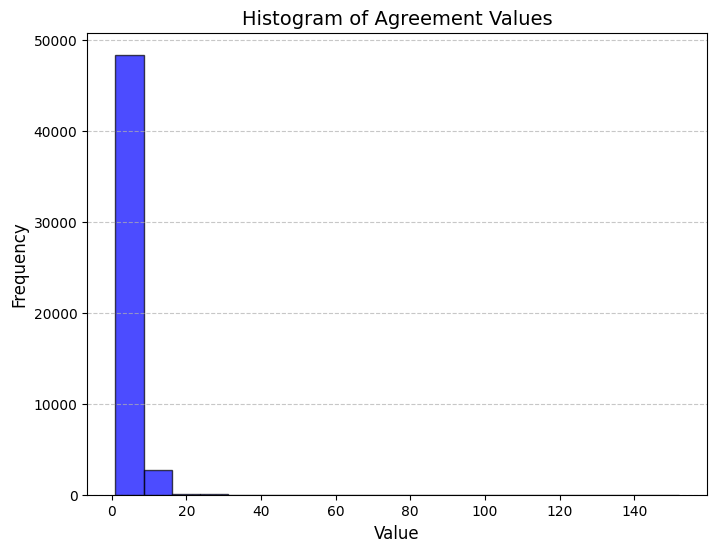

In [9]:
import matplotlib.pyplot as plt

data = [len(k) for k in new_vocabulary]

# data = list(filter(lambda x: x > 20, data))

bins = 20
plt.figure(figsize=(8, 6))
plt.hist(data, bins=bins, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Agreement Values', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

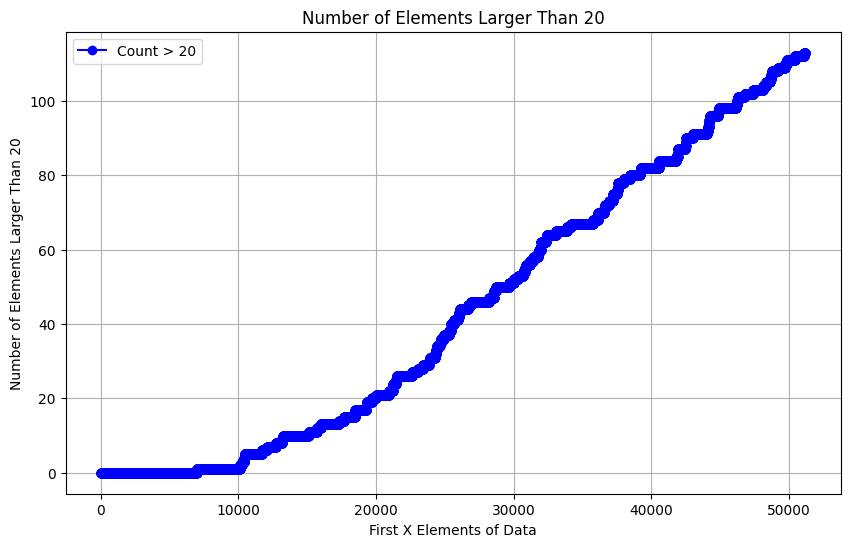

In [10]:
# Compute the X and Y values
x_values = list(range(1, len(data) + 1))
y_values = [sum(1 for value in data[:x] if value > 20) for x in x_values]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='Count > 20')
plt.title('Number of Elements Larger Than 20')
plt.xlabel('First X Elements of Data')
plt.ylabel('Number of Elements Larger Than 20')
plt.grid(True)
plt.legend()
plt.show()